# Analiza danych przestrzennych - ćwiczenia laboratoryjne 2024/2025

Ten notatnik zalicza się do grupy zestawów zadań, na podstawie których odbywa się zaliczenie ćwiczeń i podlega zwrotowi do oceny w ustalonym na zajęciach terminie.

Uwagi i wytyczne ogólne dotyczące uzupełniania i oceny notatnika:
- Podczas wykonywania zadań należy korzystać wyłącznie z pakietów zaimportowanych na początku notatnika oraz z pakietów wchodzących w skład standardowej biblioteki Pythona, które można zaimportować samodzielnie we wskazanej komórce notatnika.
- Swoje rozwiązania należy wprowadzać wyłącznie w miejce następujących fragmentów kodu:<br/> `# YOUR CODE HERE`<br/> `raise NotImplementedError()`<br/> 
a odpowiedzi tekstowe w komórkach oznaczonych hasłem:<br/> 
`YOUR ANSWER HERE`<br/> 
Nie należy w żaden sposób modyfikować pozostałych fragmentów kodu oraz innych elementów notatnika, w szczególności dodawać lub usuwać komórek oraz zmieniać nazwy pliku.
- Jeżeli zestaw zadań wymaga skorzystania z fragmentów kodu opracowanego w ramach wcześniejszych zestawów zadań należy je umieścić we wskazanej komórce notatnika.
- Otrzymywane wyniki i odpowiedzi mają być rezultatem wykonania napisanego kodu, odpowiedzi uzupełniane manualnie nie podlegają ocenie.
- Zawarte w notatniku automatyczne testy mają charakter poglądowy. Dotyczą one wybranych aspektów zadań i mają na celu wyłapać podstawowe błędy. Przejście przez kod wszystkich testów nie oznacza, że zadanie jest wykonane w całości poprawnie i zostanie ocenione na maksymalną liczbę punktów.
- Zadania należy wykonać w taki sposób, aby podczas wykonywania kodu nie zostały wyświetlone żadne ostrzeżenia.
- Zadania, które powodują wyświetlenie komunikatu o błędzie przerywającym wykonywanie kodu nie podlegają ocenie.

Uwagi i wytyczne ogólne dotyczące wizualizacji wyników:
- Wszystkie wykresy powinny być wykonane w jednolitym, przejrzystym i czytelnym stylu, posiadać odpowiednio dobrane proporcje i zakresy wartości osi.
- Figury powinny mieć ustawione białe tło, tak, aby niezależnie od ustawień notatnika wszystkie elementy wykresów były dobrze widoczne (domyślnie tło jest przeźroczyste co może powodować problemy w notatnikach z ustawionym ciemnym tłem). Rozmiar poziomy figur nie powinien przekraczać 20 cali.
- Wykresy oraz ich osie powinny mieć nadane tytuły. Jeżeli w obrębie figury znajduje się więcej niż jeden wykres to figura również powinna mieć nadany tytuł.
- Zakresy osi wykresów przedstawiających rozkłady punktów w przestrzeni powinny być docięte do granic obszaru, na którym został wygenerowany proces punktowy.
- Proporcje osi wykresów przedstawiających rozkłady punktów w przestrzeni powinny być dobrane tak, aby wykresy odzwierciedlały rzeczywisty rozkład punktów w przestrzeni. Nie należy osiągać tego efektu manipulując rozmiarem całej figury.

Przed odesłaniem zestawu zadań do oceny proszę uzupełnić komórkę z danymi autorów rozwiązania (nazwa zespołu oraz imiona, nazwiska i numery indeksów członków zespołu) oraz upewnić się, że notatnik działa zgodnie z oczekiwaniami. W tym celu należy skorzystać z opcji **Restart Kernel and Run All Cells...** dostępnej na górnej belce notatnika pod symbolem $\blacktriangleright\blacktriangleright$.

---

## Zestaw zadań 2: Badanie intensywności procesów punktowych (część 1)

In [60]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
# Miejsce do importu pakietów wchodzących w skład standardowej biblioteki Pythona oraz ustawienie opcji wykorzystywanych pakietów

### Wczytanie danych

Załączone do notatniki pliki zawierają następujące procesy punktowe:
 - `points_HP` - jednorodny rozkład Poissona,
 - `points_UP` - niejednorodny rozkład Poissona,
 - `points_M` - rozkład Materna,
 - `points_T` - rozkład Thomasa,
 
wygenerowane dla zakresu współrzędnych X $[-10, 10]$ i Y $[-5, 5]$.

W celu wczytania danych do notatnika umieść wszystkie pliki w tym samym folderze, w którym znajduje się notatnik.

In [65]:
# Wczytanie danych
points_HP = pd.read_pickle('points_HP.pkl')
points_UP = pd.read_pickle('points_UP.pkl')
points_M = pd.read_pickle('points_M.pkl')
points_T = pd.read_pickle('points_T.pkl')

### Zadanie 1: Badanie intensywności procesu punktowego metodą szacowania lokalnego (15 pkt)

Przygotuj funkcję `point_count_on_subregions()`, która będzie zliczać punkty w obrębie prostokątnych podobszarów oraz funkcję `intensity_on_subregions()`, która będzie obliczać intensywność procesu punktowego w obrębie prostokątnych podobszarów.

Algorytm postępowania:
1. Dzielimy analizowany obszar na identyczne prostokątne podobszary ułożone w równomiernej siatce (w wierszach i kolumnach).
2. Zliczamy punkty znajdujące się w poszczególych podobszarach (punkty znajdujące się na granicach podobszarów powinny być zliczone tylko do jednego z nich).
3. Obliczamy intensywność procesu w obrębie poszczególnych podobszarów dzieląc znajdującą się w nich liczbę punktów przez pole powierzchni podobszaru.

Uwagi do wykonania zadania:
- W części zadania dotyczącej funkcji obliczającej intensywność procesu nie należy dublować kodu napisanego w funkcji zliczającej punkty w obrębie prostokątnych podobszarów, a jedynie wywołać przygotowaną wcześniej funkcję `point_count_on_subregions()`.
- W metodzie szacowania lokalnego szacowanie intensywności odbywa się na kwadratowych podobszarach. W celu ułatwienia pisania funkcji warunek ten w zadaniu został rozluźniony do obszarów prostokątnych. We wszystkich zadaniach rozmiar obszaru i parametry siatki podobszarów są natomiast dobrane w taki sposób, że wygenerowane podobszary będą kwadratami.

#### a) Przygotowanie funkcji

In [69]:
def point_count_on_subregions(points, bins, x_lim, y_lim):
    """
    Parameters
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    bins: list
        Lista określająca liczbę podobszarów w poziomie i pionie.
        Przykład: [10, 10]
    x_lim: list
        Lista określająca zakres wartości współrzędnej X.
        Przykład: [0, 10]
    y_lim: list
        Lista określająca zakres wartości współrzędnej Y.
        Przykład: [0, 10]   

    Returns
    -------
    bin_data: list
        Lista zawierająca trzy macierze:
        - 2D z liczbą punków przypisanych do każdego z podobszarów.
        - 1D ze współrzędnymi krawędzi podobszarów na osi X,
        - 1D ze współrzędnymi krawędzi podobszarów na osi Y,
        Na przykład: [array([[7, 2], [4, 5]]), array([0, 1, 2]), array([0, 1, 2])]
    """
    xedges = np.linspace(x_lim[0], x_lim[1], bins[0] + 1)
    yedges = np.linspace(y_lim[0], y_lim[1], bins[1] + 1)
    
    count, xedges, yedges = np.histogram2d(points["X"], points["Y"], bins=[xedges, yedges])
    
    return [count.T, xedges, yedges]

def intensity_on_subregions(points, bins, x_lim, y_lim):
    """
    Parameters
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    bins: list
        Lista określająca liczbę podobszarów w poziomie i pionie.
        Przykład: [10, 10]
    x_lim: list
        Lista określająca zakres wartości współrzędnej X.
        Przykład: [0, 10]
    y_lim: list
        Lista określająca zakres wartości współrzędnej Y.
        Przykład: [0, 10]   

    Returns
    -------
    intensity_data: list
        Lista zawierająca trzy macierze:
        - 2D z wartością intensywności przypisą do każdego z podobszarów.
        - 1D ze współrzędnymi krawędzi podobszarów na osi X,
        - 1D ze współrzędnymi krawędzi podobszarów na osi Y,
        Na przykład: [array([[3, 7], [9, 4]]), array([0, 1, 2]), array([0, 1, 2])]
    """
    count, xedges, yedges = point_count_on_subregions(points, bins, x_lim, y_lim)
    
    area = ((x_lim[1] - x_lim[0]) / bins[0]) * ((y_lim[1] - y_lim[0]) / bins[1])
    
    intensity = count / area
    
    return [intensity, xedges, yedges]

In [71]:
# Komórka testowa
test_intensity_1 = intensity_on_subregions(points_HP, bins=[10, 5], x_lim=[-5, 5], y_lim=[-2.5, 2.5])
assert type(test_intensity_1) == list
assert len(test_intensity_1) == 3
assert np.shape(test_intensity_1[0]) == (5, 10)
assert np.all(np.isclose(np.sum(test_intensity_1[0], axis=0), np.array([47., 38., 56., 45., 54., 51., 46., 57., 50., 66.])))
assert np.all(np.isclose(np.sum(test_intensity_1[0], axis=1), np.array([98.,  96.,  96., 111., 109.])))
assert np.shape(test_intensity_1[1]) == (11,)
assert np.all(np.isclose(test_intensity_1[1], np.array([-5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.])))
assert np.shape(test_intensity_1[2]) == (6,)
assert np.all(np.isclose(test_intensity_1[2], np.array([-2.5, -1.5, -0.5,  0.5,  1.5,  2.5])))

#### b) Wygenerowanie danych i wizualizacja

Wykorzystaj funkcje przygotowane w poprzednim podpunkcie zadania do zbadania intensywności wszystkich wczytanych do notatnika rozkładów punktowych. Ustaw podział obszaru na 40 podobszarów wzdłuż osi $X$ i 20 podobszarów wzdłuż osi $Y$. Analizę przeprowadź dla całego obszaru, na którym zostały wygenerowane punkty.

Przedstaw wyniki analizy graficznie w postaci histogramów dwuwymiarowych z nałożonymi na nie rozkładami punktów. Zestaw wyniki na pojedynczej figurze (siatka wykresów 2x2).
Dla wszystkich histogramów ustaw tę samą skalę kolorów z identycznym zakresem wartości ustalonym na podstawie minimalnej i maksymalnej wartości intensywności wyznaczonej dla kompletu analizowanych rozkładów.

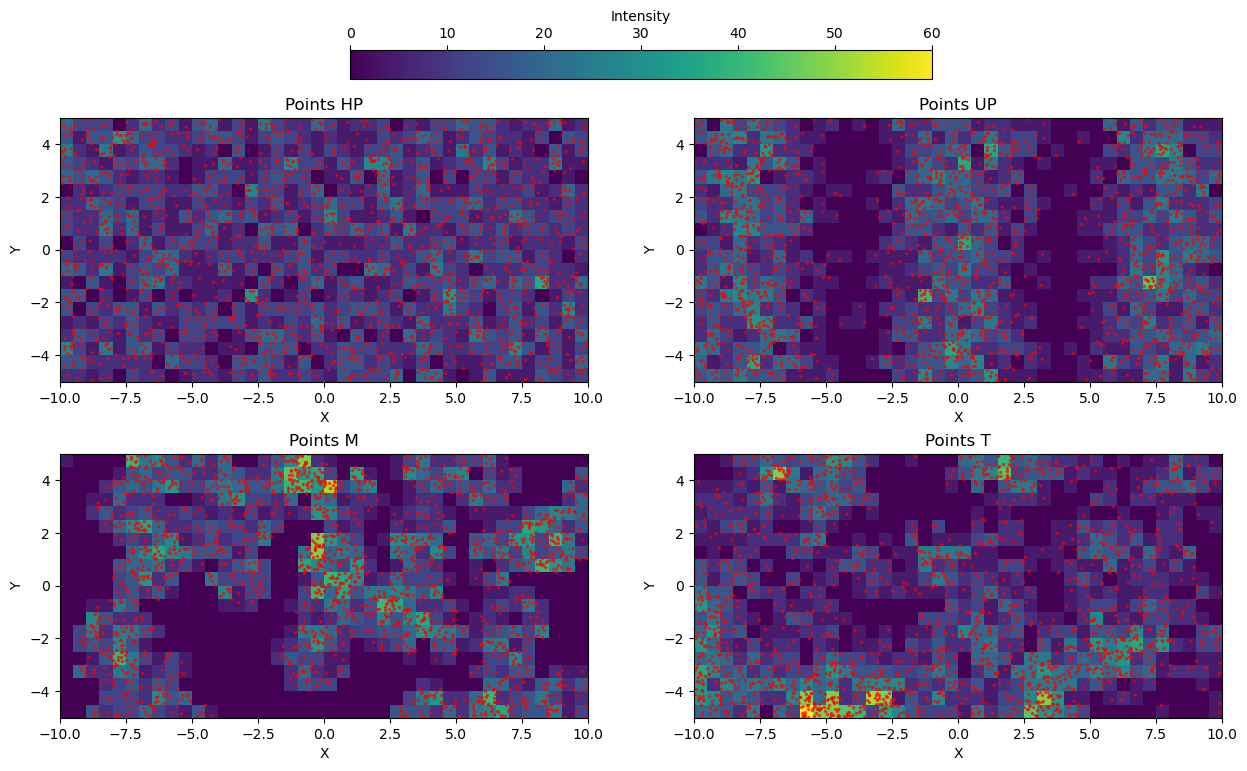

In [74]:
bins = [40, 20]
x_lim = [-10, 10]
y_lim = [-5, 5]

intensity_HP = intensity_on_subregions(points_HP, bins, x_lim, y_lim)
intensity_UP = intensity_on_subregions(points_UP, bins, x_lim, y_lim)
intensity_M = intensity_on_subregions(points_M, bins, x_lim, y_lim)
intensity_T = intensity_on_subregions(points_T, bins, x_lim, y_lim)

all = np.array([intensity_HP[0], intensity_UP[0], intensity_M[0], intensity_T[0]])
min = all.min()
max = all.max()

fig, axis = plt.subplots(2, 2, figsize=(15, 10))
titles = ['Points HP', 'Points UP', 'Points M', 'Points T']
intensity_data = [intensity_HP, intensity_UP, intensity_M, intensity_T]
points_data = [points_HP, points_UP, points_M, points_T]

for ax, intensity, points, title in zip(axis.ravel(), intensity_data, points_data, titles):
    c = ax.pcolormesh(intensity[1], intensity[2], intensity[0], shading='auto', vmin=min, vmax=max, cmap='viridis')
    ax.scatter(points['X'], points['Y'], color='red', s=2, alpha=0.6)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_aspect(1)

fig.colorbar(c, ax=axis[:,:], shrink=0.5, location='top', label='Intensity')
plt.show()

### Zadanie 2: Badanie intensywności procesu punktowego metodą funkcji jądrowych (20 pkt)

Przygotuj funkcję `intensity_on_kde()`, która będzie obliczać intensywność procesu punktowego z wykorzystaniem jądrowego estymatora intensywności.

Algorytm postępowania:
1) Generujemy punkty pomiarowe na regularnej siatce tak, że poszczególne punkty są oddalone od siebie o odległość $d_x$ w poziomie i $d_y$ w pionie, a skrajne punkty leżą na granicach analizowanego obszaru.
2) Dla każdego z wygenerowanych punktów pomiarowych szacujemy intensywność procesu za pomocą jądrowego estymatora intensywności danego wzorem:
$$ 	\grave{\lambda}(x,y) = \sum_{d_i < \tau} \frac{3}{\pi \tau^2}(1-\frac{d_i^2}{\tau^2})^2$$ 
gdzie: $d_i$ - odległość punktu od centrum funkcji jądrowej, $\tau$ - promień funkcji jądrowej.

Uwagi do wykonania zadania:
- Podczas pisania funkcji należy wykorzystać maksymalnie jedną pętlę `for` iterującą po kolejnych pozycjach funkcji jądrowej. Nie należy korzystać z pętli `for` podczas wyliczania wartości funkcji jądrowej w poszczególnych jej lokalizacjach.
- Funkcja przygotowana według powyższych wytycznych nie ma wbudowanego mechanizmu korekty na efekt brzegowy, w związku z czym będzie zaniżać wartość intensywności przy krawędziach analizowanego obszaru.

#### a) Przygotowanie funkcji

In [78]:
def intensity_on_kde(points, kernel_radius, grid, x_lim, y_lim):
    """
    Parameters
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    kernel_radius: float
        Liczba dodatnia określająca promień funkcji jądrowej.
    grid: list
        Lista określająca liczbę punktów w poziomie i pionie, dla których wyliczane będą wartości intensywności.
        Przykład: [10, 10]
    x_lim: list
        Lista określająca zakres wartości współrzędnej X.
        Przykład: [0, 10]
    y_lim: list
        Lista określająca zakres wartości współrzędnej Y.
        Przykład: [0, 10]   

    Returns
    -------
    intensity_data: DataFrame
        Tablica zawierająca trzy kolumny - dwie ze współrzędnymi punktów, dla których wyliczone zostały wartości intensywności
        opisane jako "X" i "Y" oraz kolumnę z wartościami intensywności wyliczonymi dla tych współrzędnych opisaną jako "I".
    """
    dx = (x_lim[1]-x_lim[0])/(grid[0]-1) 
    dy = (y_lim[1]-y_lim[0])/(grid[1]-1)
    arange_x = np.arange(x_lim[0],x_lim[1]+dx,dx)
    arange_y = np.arange(y_lim[0],y_lim[1]+dy,dy)
    x,y = np.meshgrid(arange_x,arange_y)
    x = x.flatten()
    y = y.flatten()
    dataframe  = pd.DataFrame({"X":x,"Y":y})    
    distances = sp.spatial.distance.cdist(dataframe,points)
    print(len(dataframe))
    print(np.shape(distances))
    intensity = []
    for position in distances:
        summation = position[position < kernel_radius]
        summation = 3/(np.pi*kernel_radius**2)*(1-(summation**2)/kernel_radius**2)**2
        intensity.append(np.sum(summation))
    dataframe["I"] = intensity
    return dataframe
test_intensity_2 = intensity_on_kde(points_HP, kernel_radius=1.25, grid=[50, 25], x_lim=[-5, 5], y_lim=[-2.5, 2.5])

1250
(1250, 2036)


In [80]:
# Komórka testowa
test_intensity_2 = intensity_on_kde(points_HP, kernel_radius=1.25, grid=[50, 25], x_lim=[-5, 5], y_lim=[-2.5, 2.5])
assert type(test_intensity_2) == pd.DataFrame
assert test_intensity_2.shape == (1250, 3)
assert list(test_intensity_2.columns) == ["X", "Y", "I"]
assert np.isclose(np.min(test_intensity_2["X"]), -5)
assert np.isclose(np.max(test_intensity_2["X"]), 5)
assert np.isclose(np.min(test_intensity_2["Y"]), -2.5)
assert np.isclose(np.max(test_intensity_2["Y"]), 2.5)
assert np.isclose(np.min(test_intensity_2["I"]), 4.063039686796769)
assert np.isclose(np.max(test_intensity_2["I"]), 15.939182630365504)
assert np.isclose(np.mean(test_intensity_2["I"]), 10.041689189726556)

1250
(1250, 2036)


#### b) Wygenerowanie danych i wizualizacja
Wykorzystaj przygotowaną funkcje do zbadania intensywności wszystkich wczytanych do notatnika rozkładów punktowych. Wykonaj obliczania dla promienia funkcji jądrowej równego 1.5 i siatki 200x100 punktów pomiarowych. Analizę przeprowadź dla całego obszaru, na którym zostały wygenerowane punkty.

Przedstaw wyniki analizy graficznie w postaci wykresów konturowych z wypełnieniem z nałożonymi na nie rozkładami punktów. Zestaw wyniki na pojedynczej figurze (siatka wykresów 2x2). Dla wszystkich histogramów ustaw tę samą skalę kolorów z identycznym zakresem wartości ustalonym na podstawie minimalnej i maksymalnej wartości intensywności wyznaczonej dla kompletu analizowanych rozkładów.

20000
(20000, 2036)
20000
(20000, 1993)
20000
(20000, 1971)
20000
(20000, 1974)


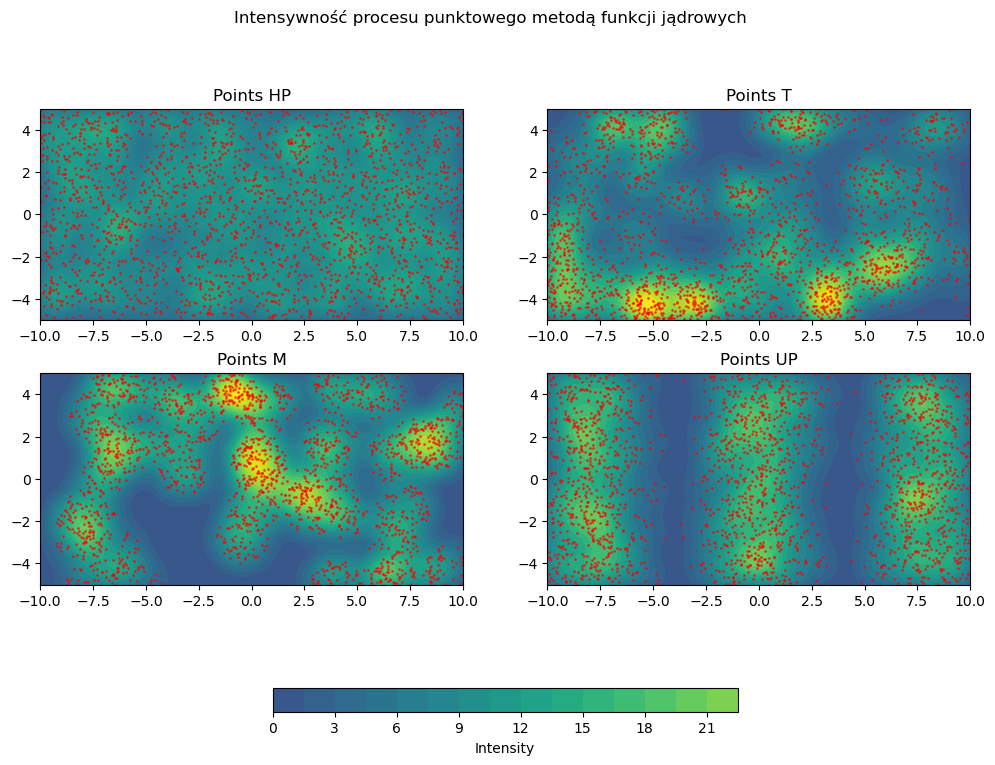

In [83]:
intensity1_plot = intensity_on_kde(points_HP, kernel_radius=1.5, grid=[200, 100], x_lim=[-10, 10], y_lim=[-5,5]) 
intensity2_plot = intensity_on_kde(points_M, kernel_radius=1.5, grid=[200, 100], x_lim=[-10, 10], y_lim=[-5,5]) 
intensity3_plot = intensity_on_kde(points_T, kernel_radius=1.5, grid=[200, 100], x_lim=[-10, 10], y_lim=[-5,5]) 
intensity4_plot = intensity_on_kde(points_UP, kernel_radius=1.5, grid=[200, 100], x_lim=[-10, 10], y_lim=[-5,5])

all = np.array([intensity1_plot, intensity2_plot, intensity3_plot, intensity4_plot])
min = all.min()
max = all.max()

fig, axis = plt.subplots(2,2,figsize =(12,9), facecolor="white")
c1 = axis[0,0].tricontourf(intensity1_plot["X"],intensity1_plot["Y"],intensity1_plot["I"], levels=20, vmin=min, vmax=max)
axis[0, 0].scatter(data=points_HP, x="X", y="Y", color='red', s=1, alpha=0.6)
axis[0,0].set_xlim(-10, 10)
axis[0,0].set_ylim(-5, 5)
axis[0,0].set_aspect(1)
axis[0,0].set_title("Points HP")

c2 = axis[1,0].tricontourf(intensity2_plot["X"],intensity2_plot["Y"],intensity2_plot["I"], levels=20, vmin=min, vmax=max)
axis[1, 0].scatter(data=points_M, x="X", y="Y", color='red', s=1, alpha=0.6)
axis[1,0].set_xlim(-10, 10)
axis[1,0].set_ylim(-5, 5)
axis[1,0].set_aspect(1)
axis[1,0].set_title("Points M")

c3 = axis[0,1].tricontourf(intensity3_plot["X"],intensity3_plot["Y"],intensity3_plot["I"], levels=20, vmin=min, vmax=max)
axis[0,1].scatter(data=points_T, x="X", y="Y", color='red', s=1, alpha=0.6)
axis[0,1].set_xlim(-10, 10)
axis[0,1].set_ylim(-5, 5)
axis[0,1].set_aspect(1)
axis[0,1].set_title("Points T")
 
c4 = axis[1,1].tricontourf(intensity4_plot["X"],intensity4_plot["Y"],intensity4_plot["I"], levels=20, vmin=min, vmax=max)
axis[1, 1].scatter(data=points_UP, x="X", y="Y", color='red', s=1, alpha=0.6)
axis[1,1].set_xlim(-10, 10)
axis[1,1].set_ylim(-5, 5)
axis[1,1].set_aspect(1)
axis[1,1].set_title("Points UP")

fig.colorbar(c4, ax=axis, shrink=0.5, location='bottom', label='Intensity')
fig.suptitle("Intensywność procesu punktowego metodą funkcji jądrowych")

plt.show()